In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pyecharts
import random
import requests

In [5]:
def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

def split_datetime(dt):
    return str(dt.split( )[:2][0])+'-2020'

def split_date(dt):
    if dt.split( )[2] =='on':
        return dt.split( )[3]
    if dt.split( )[2] =='??Monday':
        return 'Monday'
    return dt.split( )[2]

def split_month(dt):
    return dt.split( )[0].split('-')[0]

def split_jour(dt):
    j=int(dt.split( )[1].split(':')[0])
    if j <=6 :
        return 'midnight'
    if j <= 11:
        return 'morning'
    if j <=14 : 
        return 'noon'
    if j<= 18:
        return 'afternoon'
    if j<= 24:
        return 'evening'
    
def count_rows(rows):
    return len(rows)



# def ratings_norm(df):#函数的参数是一个DataFrame
#     min_value = df["The amount [yuan]"].sum()
#     max_value = df["Rating"].max()
#     df["Rating_norm"] = df["Rating"].apply(lambda x:(x-min_value)/(max_value-min_value))
#     return df



## ETL(Extract, Tansform, Load)

In [6]:
path = r"data/data(tranlated_utf-8).csv"
df = pd.read_csv(path, delimiter = ',')
df.values[:,1:]

array([['express train', '03-28 23:14 Thursday', 'Beijing', ...,
        'Guanyin Temple Community 25th', 4.5, 17.2],
       ['express train', '03-31 15:21 Sunday', 'Beijing', ...,
        'Daxing District | Kang Taiyuan', 2.8, 10.4],
       ['express train', '03-31 19:48 Sunday', 'Beijing', ...,
        'Xingye Street | Beijing Petrochemical Institute - North 1', 2.3,
        9.1],
       ...,
       ['Drip express', '08-18 15:45 Wednesday', 'Beijing', ...,
        "Right Anmen | Beijing You'an Hospital, Capital Medical University - West 1",
        17.26, 35.42],
       ['Drip express', '08-18 18:56 Wednesday', 'Beijing', ...,
        'Daxing District | No. 189 Xingsheng Street - East 2', 7.7,
        27.36],
       ['Drip express', '08-18 20:09 Wednesday', 'Beijing', ...,
        'Xingye Street | Red Wooden Community North District - South Gate',
        1.01, 11.76]], dtype=object)

In [173]:
df['datetime']=df['Time to get on the train'].map(split_datetime)
df['datetime']=df['datetime'].map(pd.to_datetime)
df.head()

,Serial number,Model,Time to get on the train,city,starting point,end,Mileage [km],The amount [yuan],datetime
0,1,express train,03-28 23:14 Thursday,Beijing,Xingye Street | Beijing Petrochemical Institut...,Guanyin Temple Community 25th,4.5,17.20,2020-03-28
1,2,express train,03-31 15:21 Sunday,Beijing,Xinghua Street | Zaoyuan East - West District ...,Daxing District | Kang Taiyuan,2.8,10.40,2020-03-31
2,3,express train,03-31 19:48 Sunday,Beijing,Kangmei Road | Kang Taiyuan - South Gate,Xingye Street | Beijing Petrochemical Institut...,2.3,9.10,2020-03-31
3,4,express train,04-02 10:34 Tuesday,Beijing,Beijing Petrochemical Academy - South Gate,Guanyin Temple Community 25th,3.9,11.44,2020-04-02
4,5,express train,04-03 07:13 Wednesday,Beijing,Guanyin Temple - North Gate,Xinghua Street | Beijing Petrochemical Institu...,3.8,18.08,2020-04-03


In [174]:
df.describe()

,Mileage [km],The amount [yuan]
count,280.000000,280.000000
mean,6.368214,19.046429
std,18.921967,12.399218
min,0.000000,4.000000
25%,3.275000,13.130000
50%,4.300000,15.420000
75%,5.400000,19.852500
max,310.000000,101.730000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Serial number             280 non-null    object        
 1   Model                     280 non-null    object        
 2   Time to get on the train  280 non-null    object        
 3   city                      280 non-null    object        
 4   starting point            280 non-null    object        
 5   end                       280 non-null    object        
 6   Mileage [km]              280 non-null    float64       
 7   The amount [yuan]         280 non-null    float64       
 8   datetime                  280 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 19.8+ KB


In [176]:
df.isnull().sum()

Serial number               0
Model                       0
Time to get on the train    0
city                        0
starting point              0
end                         0
Mileage [km]                0
The amount [yuan]           0
datetime                    0
dtype: int64

matplotlib.axes._subplots.AxesSubplot

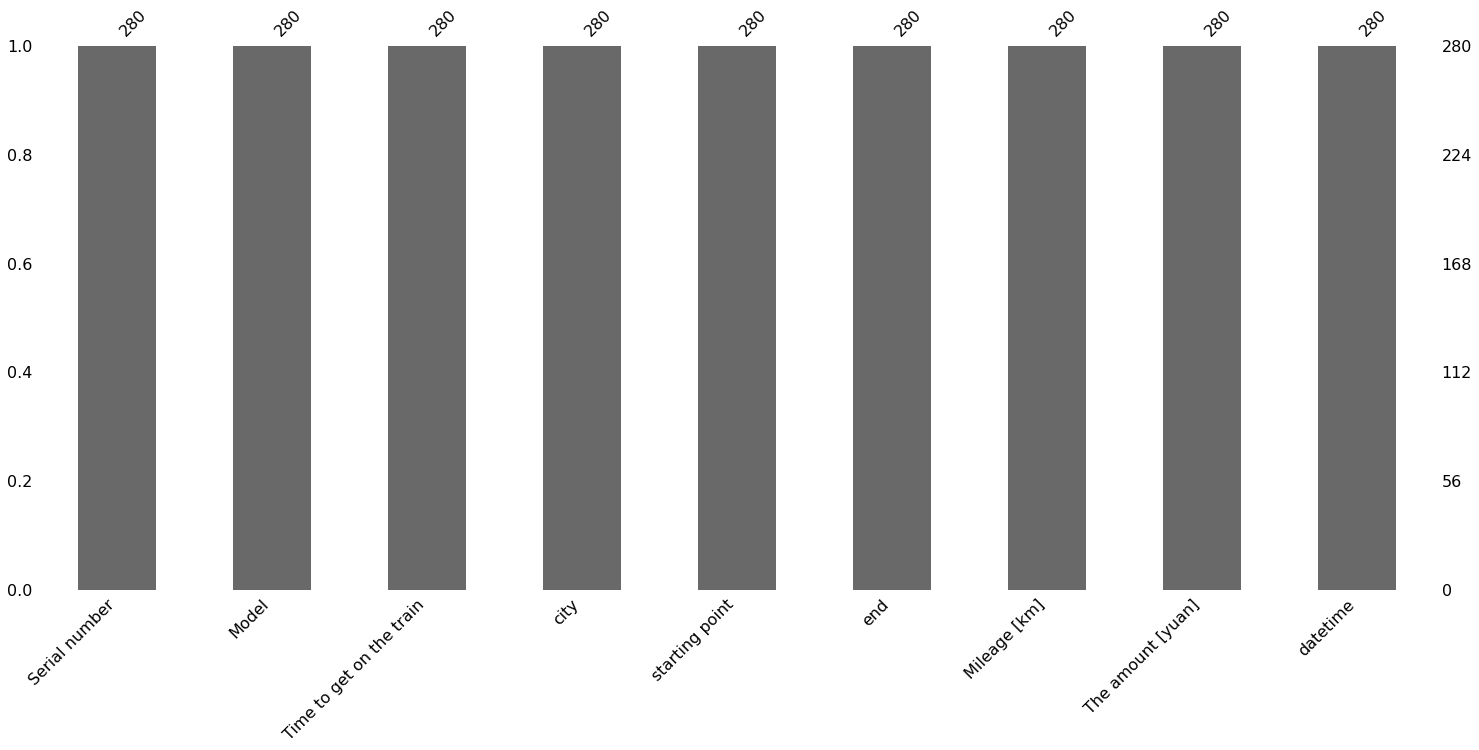

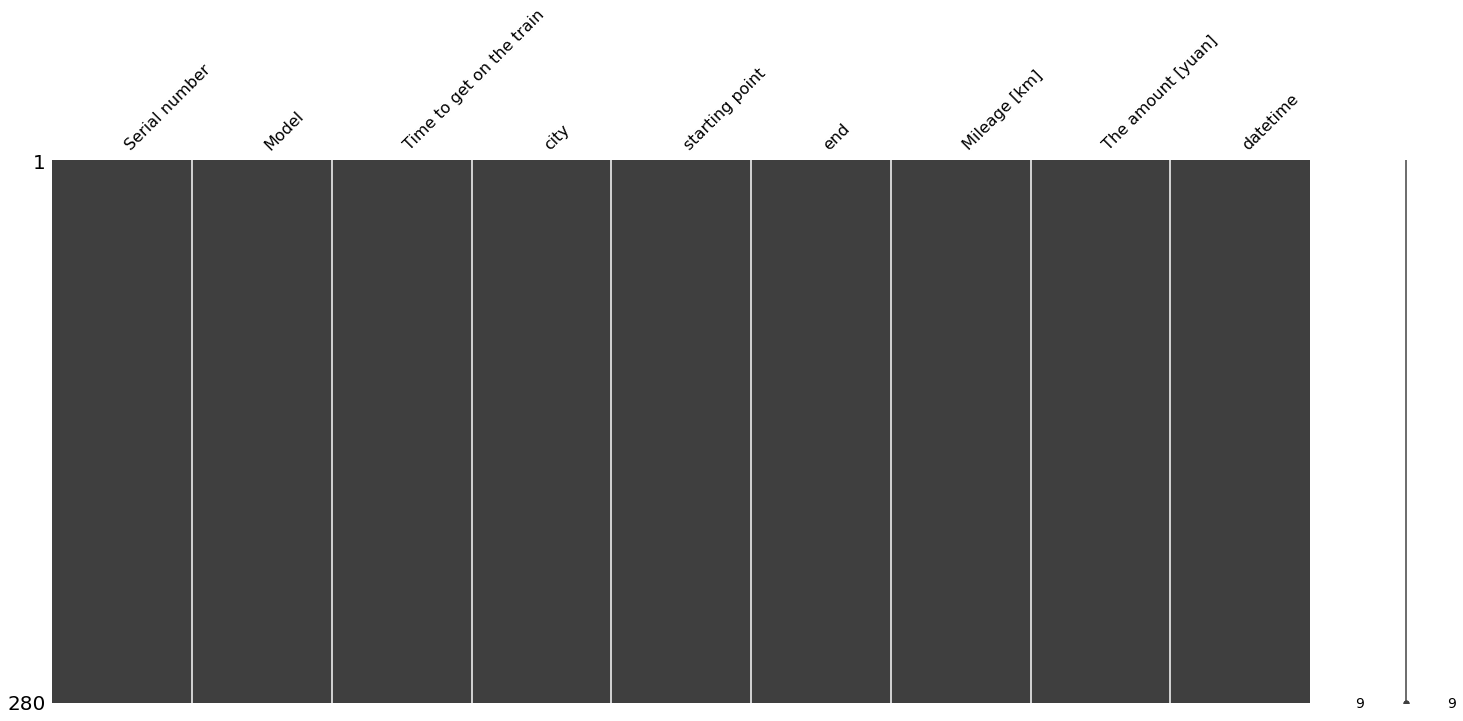

In [177]:
msno.bar(df)
type(msno.matrix(df))

## Frequency by DoM -DIDI - 2020

#### Frequency of Traveling by DoM -DIDI -2020

In [178]:
df['DATE']=df['Time to get on the train'].map(split_date)

In [179]:
#Cause I want to Sort by week,BUT they are string, To deal it,I create a Sorting rule
from pandas.api.types import CategoricalDtype
#create a CategoricalDtype
cat_DATE_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'], 
    ordered=True
)
df['DATE'] = df['DATE'].astype(cat_DATE_order) #Forced conversion type
data_date=df.groupby(['DATE']).apply(count_rows)#Get the number of each date
# data_date.to_frame().sort_values('DATE', inplace=True)
data_date

DATE
Monday       34
Tuesday      44
Wednesday    55
Thursday     37
Friday       34
Saturday     39
Sunday       37
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM -DIDI - 2020')

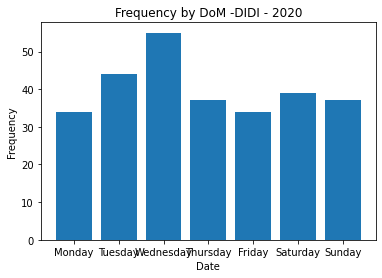

In [180]:
plt.bar(range(1, 8), data_date)
plt.xticks(range(1, 8), data_date.index)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency by DoM -DIDI - 2020')


In [181]:
df['MONTH']=df['Time to get on the train'].map(split_month)#Take MONTH out of ‘Time to get on the train’
df.tail()

,Serial number,Model,Time to get on the train,city,starting point,end,Mileage [km],The amount [yuan],datetime,DATE,MONTH
275,276,Drip express,08-18 07:23 Wednesday,Beijing,Beijing Millennium Hotel - Mainmen,"Building 25, Guanyin Temple, Daxing District, ...",36.10,101.73,2020-08-18,Wednesday,08
276,277,Drip express,08-18 15:05 Wednesday,Beijing,Guanyin Temple - North Gate,Xinghua Street | Zaoyuan Shangcheng South Dist...,4.50,15.10,2020-08-18,Wednesday,08
277,278,Drip express,08-18 15:45 Wednesday,Beijing,Xinghua Street | Zaoyuan Shangcheng South Dist...,"Right Anmen | Beijing You'an Hospital, Capital...",17.26,35.42,2020-08-18,Wednesday,08
278,279,Drip express,08-18 18:56 Wednesday,Beijing,Beijing Longhu Daxingtian Street - Southeast Gate,Daxing District | No. 189 Xingsheng Street - E...,7.70,27.36,2020-08-18,Wednesday,08
279,280,Drip express,08-18 20:09 Wednesday,Beijing,"No. 189, Xingsheng Street - East 2",Xingye Street | Red Wooden Community North Dis...,1.01,11.76,2020-08-18,Wednesday,08


In [182]:
#Since there is no Tuesday in the dataset, I need to add an element for Tuesday
data_month=df.groupby(['MONTH']).apply(count_rows)#group by month
# Creating the block Series 
m2 = pd.Series([0])  
# Create the block Index 
index_2 = ['02']  
# set the index of block series 
m2.index = index_2 
data_month=data_month.append(m2)
data_month=data_month.sort_values(key=lambda x: x.index)

In [183]:
data_month.describe()

count    12.000000
mean     23.333333
std      19.075607
min       0.000000
25%      10.500000
50%      15.500000
75%      39.750000
max      53.000000
dtype: float64

Text(0.5, 1.0, 'Frequency by MONTH -DIDI - 2021')

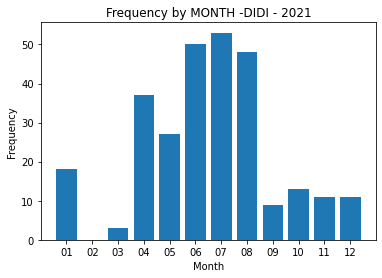

In [184]:
#as we can see the value of Tuesday is empty but still be there
plt.bar(range(1, 13), data_month)
plt.xticks(range(1, 13), data_month.index)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency by MONTH -DIDI - 2021')

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

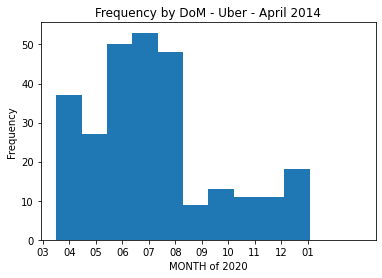

In [185]:
plt.hist(df.MONTH,bins=12,range=(0.5,12))
plt.xlabel('MONTH of 2020')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Uber - April 2014')

In [186]:
#Take Time_Period[morning/afternoon etc] out of ‘Time to get on the train’
df['Time_Period']=df['Time to get on the train'].map(split_jour)
df.tail()

,Serial number,Model,Time to get on the train,city,starting point,end,Mileage [km],The amount [yuan],datetime,DATE,MONTH,Time_Period
275,276,Drip express,08-18 07:23 Wednesday,Beijing,Beijing Millennium Hotel - Mainmen,"Building 25, Guanyin Temple, Daxing District, ...",36.10,101.73,2020-08-18,Wednesday,08,morning
276,277,Drip express,08-18 15:05 Wednesday,Beijing,Guanyin Temple - North Gate,Xinghua Street | Zaoyuan Shangcheng South Dist...,4.50,15.10,2020-08-18,Wednesday,08,afternoon
277,278,Drip express,08-18 15:45 Wednesday,Beijing,Xinghua Street | Zaoyuan Shangcheng South Dist...,"Right Anmen | Beijing You'an Hospital, Capital...",17.26,35.42,2020-08-18,Wednesday,08,afternoon
278,279,Drip express,08-18 18:56 Wednesday,Beijing,Beijing Longhu Daxingtian Street - Southeast Gate,Daxing District | No. 189 Xingsheng Street - E...,7.70,27.36,2020-08-18,Wednesday,08,afternoon
279,280,Drip express,08-18 20:09 Wednesday,Beijing,"No. 189, Xingsheng Street - East 2",Xingye Street | Red Wooden Community North Dis...,1.01,11.76,2020-08-18,Wednesday,08,evening


In [187]:
from pandas.api.types import CategoricalDtype
#create a CategoricalDtype
cat_tp_order = CategoricalDtype(
    ['morning', 'noon' , 'afternoon','evening','midnight'], 
    ordered=True
)
df['Time_Period'] = df['Time_Period'].astype(cat_tp_order)
data_tp=df.groupby(['Time_Period']).apply(count_rows)
# data_tp.to_frame().sort_values('Time_Period', inplace=True)
data_tp,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Serial number             280 non-null    object        
 1   Model                     280 non-null    object        
 2   Time to get on the train  280 non-null    object        
 3   city                      280 non-null    object        
 4   starting point            280 non-null    object        
 5   end                       280 non-null    object        
 6   Mileage [km]              280 non-null    float64       
 7   The amount [yuan]         280 non-null    float64       
 8   datetime                  280 non-null    datetime64[ns]
 9   DATE                      280 non-null    category      
 10  MONTH                     280 non-null    object        
 11  Time_Period               280 non-null    category      
dtypes: category(2), dateti

(Time_Period
 morning      56
 noon         59
 afternoon    82
 evening      81
 midnight      2
 dtype: int64,
 None)

Text(0.5, 1.0, 'Frequency by Time_Period -DIDI - 2021')

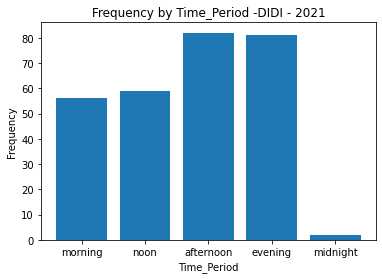

In [188]:
plt.bar(range(1, 6), data_tp)
plt.xticks(range(1, 6), data_tp.index)
plt.xlabel('Time_Period')
plt.ylabel('Frequency')
plt.title('Frequency by Time_Period -DIDI - 2021')

Text(0.5, 1.0, 'Frequency by Time_Period -DIDI - 2021')

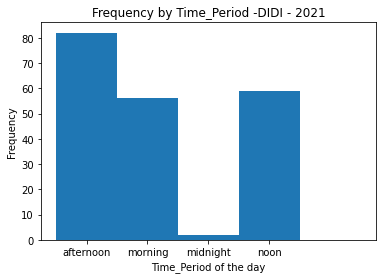

In [189]:
plt.hist(df.Time_Period,bins=5,range=(0.5,5.5))
plt.xlabel('Time_Period of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Time_Period -DIDI - 2021')

In [190]:
print(type(df['datetime']))

<class 'pandas.core.series.Series'>


#### Spending & Mileage  of Traveling by DoM -DIDI -2021

In [191]:
tp=df.groupby('Time_Period').sum()
tp

,Mileage [km],The amount [yuan]
Time_Period,,
morning,318.05,1085.04
noon,356.33,1209.25
afternoon,419.78,1539.60
evening,682.00,1470.16
midnight,6.94,28.95


In [192]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
# print(tp['The amount [yuan]'].to_list())
c = (
    Bar()
    .add_xaxis(tp.index.to_list())#[LIST],Time_Period
    .add_yaxis("The amount [CNY]",tp['The amount [yuan]'].to_list(), stack="stack1")
    .add_yaxis("Mileage[km]",tp['Mileage [km]'].to_list(), stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="Spending & Mileage of Traveling"))
    #if wanna render on a new page use the following
    #.render("Spending & Mileage of Traveling by DoM -DIDI -2021.html")
).render_notebook()
c

In [193]:
df.head()

,Serial number,Model,Time to get on the train,city,starting point,end,Mileage [km],The amount [yuan],datetime,DATE,MONTH,Time_Period
0,1,express train,03-28 23:14 Thursday,Beijing,Xingye Street | Beijing Petrochemical Institut...,Guanyin Temple Community 25th,4.5,17.20,2020-03-28,Thursday,03,evening
1,2,express train,03-31 15:21 Sunday,Beijing,Xinghua Street | Zaoyuan East - West District ...,Daxing District | Kang Taiyuan,2.8,10.40,2020-03-31,Sunday,03,afternoon
2,3,express train,03-31 19:48 Sunday,Beijing,Kangmei Road | Kang Taiyuan - South Gate,Xingye Street | Beijing Petrochemical Institut...,2.3,9.10,2020-03-31,Sunday,03,evening
3,4,express train,04-02 10:34 Tuesday,Beijing,Beijing Petrochemical Academy - South Gate,Guanyin Temple Community 25th,3.9,11.44,2020-04-02,Tuesday,04,morning
4,5,express train,04-03 07:13 Wednesday,Beijing,Guanyin Temple - North Gate,Xinghua Street | Beijing Petrochemical Institu...,3.8,18.08,2020-04-03,Wednesday,04,morning


## Frequency by PLACE -DIDI - 2021

## Wordscould

In [194]:
#Since the user will define a 'current location' for easier input, and mine is this address, I need to convert it. 
def rename(ad):
    if ad == 'current position':
        ad='Guanyin Temple - North Gate'
    return ad

In [195]:
df['starting point']=df['starting point'].map(rename)
df['end']=df['end'].map(rename)
df['starting point'],df['end']

(0      Xingye Street | Beijing Petrochemical Institut...
 1      Xinghua Street | Zaoyuan East - West District ...
 2               Kangmei Road | Kang Taiyuan - South Gate
 3             Beijing Petrochemical Academy - South Gate
 4                            Guanyin Temple - North Gate
                              ...                        
 275                   Beijing Millennium Hotel - Mainmen
 276                          Guanyin Temple - North Gate
 277    Xinghua Street | Zaoyuan Shangcheng South Dist...
 278    Beijing Longhu Daxingtian Street - Southeast Gate
 279                   No. 189, Xingsheng Street - East 2
 Name: starting point, Length: 280, dtype: object,
 0                          Guanyin Temple Community 25th
 1                         Daxing District | Kang Taiyuan
 2      Xingye Street | Beijing Petrochemical Institut...
 3                          Guanyin Temple Community 25th
 4      Xinghua Street | Beijing Petrochemical Institu...
                     

In [196]:
#Using the dictionary, get the number of times each address 
Dic={}
for i in df['starting point']:
    Dic[i]=Dic.get(i,0)+1
        
startls= list(Dic.items())
startls.sort(key = lambda item:item[1],reverse =True)
   
    
Dic={}
for i in df['end']:
    Dic[i]=Dic.get(i,0)+1
        
endls= list(Dic.items())
endls.sort(key = lambda item:item[1],reverse =True)
startls,endls

([('Guanyin Temple - North Gate', 108),
  ('Xinghua Street | Beijing Petrochemical Technology - North 2', 19),
  ('Xinghua Street | Beijing Petrochemical Institute - South Gate', 14),
  ('Kangmei Road | Kang Taiyuan - South Gate', 9),
  ('Xingye Street | Industrial and Commercial Bank of China (Liyuan Road Branch)',
   9),
  ('Xingye Street | Industrial and Commercial Bank of China (Liyuan Road Branch\n)opposite',
   4),
  ('Xinbei Northeast Cuisine (Kangzhuang Road)', 4),
  ('Xinghua Street | Zaoyuan Shangcheng South District - East Gate', 4),
  ('Xinghua Street | Century Hualian life supermarket Zaoyuan store', 4),
  ('Archway East Street 23 - West Gate', 4),
  ('No. 189, Xingsheng Street - East 2', 3),
  ('Xinghua Street | Beijing Petrochemical Institute - North 3', 3),
  ('Xingye Street | Beijing Petrochemical Institute - North 1', 2),
  ('Beijing Petrochemical Academy - South Gate', 2),
  ('Xinghua Park - Bus Station Road West', 2),
  ('Xinbei Northeast (Kangzhuang Road) Southwest

In [197]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
c = (
    WordCloud()
    .add("", endls,  shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="drop off"))
    #.render("wordcloud_end.html")
).render_notebook()
c

In [198]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
a= (
    WordCloud()
    .add(
        "",
        startls,

        textstyle_opts=opts.TextStyleOpts(font_family="cursive"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="pick up"))
    #.render("wordcloud_start.html")
).render_notebook()
a

##  DO LIKE THAT 
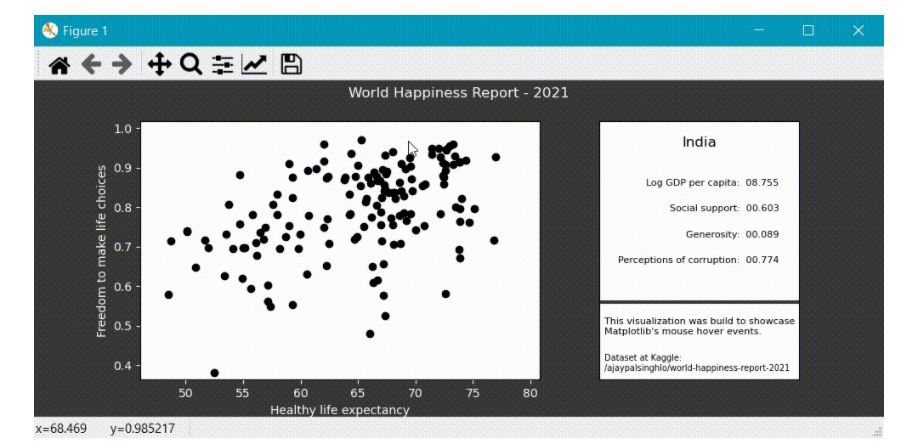

In [199]:
path = r"data/data(zh_utf-8).csv"
dff = pd.read_csv(path, delimiter = ',')
dff.head()

,序号,车型,上车时间,城 市,起点,终点,里程 [公里],金额 [元]
0,1,快车,03-28 23:14 周四,北京市,兴业大街|北京石油化工学院-北1门,观音寺小区25号楼,4.5,17.20
1,2,快车,03-31 15:21 周日,北京市,兴华大街|枣园东里-西区-南门,大兴区|康泰园,2.8,10.40
2,3,快车,03-31 19:48 周日,北京市,康庄路|康泰园-南门,兴业大街|北京石油化工学院-北1门,2.3,9.10
3,4,快车,04-02 10:34 周二,北京市,北京石油化工学院-南门,观音寺小区25号楼,3.9,11.44
4,5,快车,04-03 07:13 周三,北京市,观音寺-北门,兴华大街|北京石油化工学院-南门,3.8,18.08


## Convert text address to latitude and longitude with Chrome Driver

## use the from selenium import webdriver

In [200]:
from bs4 import BeautifulSoup 
import time
import requests
import re
import datetime
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
import time
import requests
import re
import datetime
import csv
import win32clipboard as w
import win32con
import win32api

def getText():  # Read clipboard
    w.OpenClipboard()
    d = w.GetClipboardData(win32con.CF_TEXT)
    w.CloseClipboard()
    return d

def Convert(ad):   
    ls=[]
    chrome_driver ='D:\chromedriver\92\chromedriver.exe' #the address of chrome_driver
    browser=webdriver.Chrome(executable_path=chrome_driver)
    browser.get(r'https://lbs.amap.com/tools/picker')    # requests 
    for i in ad:
        elem_user = browser.find_element_by_name("search")
        browser.find_element_by_name("search").send_keys(Keys.CONTROL,"a")
        browser.find_element_by_name("search").send_keys(Keys.BACKSPACE)
        elem_user.send_keys(i)
        elem_user=browser.find_element_by_class_name('picker-btn.btn-search').click()
        elem_user=browser.find_element_by_class_name('picker-btn.picker-copy').click()
        ss = getText()
        ls.append(ss)
        time.sleep(0.1)
    browser.close()
    return pd.DataFrame(ls)



###### dff['cmplt_start_address_converted']=Convert(df['cmplt_start_address'].to_list())

###### dff['cmplt_ending_address_converted']=Convert(df['cmplt_ending_address'].to_list())

###### dff.to_csv("converted_data.csv",encoding='utf_8_sig')

In [32]:
path = r"converted_data.csv"
df1 = pd.read_csv(path, delimiter = ',')
df1.head(1)

,序号,车型,上车时间,城 市,起点,终点,里程 [公里],金额 [元],cmplt_start_address,cmplt_ending_address,cmplt_start_address_converted,cmplt_ending_address_converted
0,1,快车,03-28 23:14 周四,北京市,兴业大街|北京石油化工学院-北1门,观音寺小区25号楼,4.5,17.2,北京市兴业大街|北京石油化工学院-北1门,北京市观音寺小区25号楼,"116.324701,39.7499","116.3473,39.7278"


In [33]:
df1.head(1)

,序号,车型,上车时间,城 市,起点,终点,里程 [公里],金额 [元],cmplt_start_address,cmplt_ending_address,cmplt_start_address_converted,cmplt_ending_address_converted
0,1,快车,03-28 23:14 周四,北京市,兴业大街|北京石油化工学院-北1门,观音寺小区25号楼,4.5,17.2,北京市兴业大街|北京石油化工学院-北1门,北京市观音寺小区25号楼,"116.324701,39.7499","116.3473,39.7278"


In [34]:
start_1=[ x for x in np.arange(float(df1['cmplt_start_address_converted'].apply(lambda x:x.split(',')[0]).min()),
                      float(df1['cmplt_start_address_converted'].apply(lambda x:x.split(',')[0]).max()),
                         (float(df1['cmplt_start_address_converted'].apply(lambda x:x.split(',')[0]).max())
                          -float(df1['cmplt_start_address_converted'].apply(lambda x:x.split(',')[0]).min()))
                          /(len(set(df1['cmplt_start_address_converted'].apply(lambda x:x.split(',')[0])))))]

In [35]:
start_1=df1['cmplt_start_address_converted'].apply(lambda x:float(x.split(',')[0])).to_list()

In [36]:
start_2=df1['cmplt_start_address_converted'].apply(lambda x:float(x.split(',')[1])).to_list()

In [37]:
end_1=df1['cmplt_ending_address_converted'].apply(lambda x:float(x.split(',')[0])).to_list()

In [38]:
end_2=df1['cmplt_ending_address_converted'].apply(lambda x:float(x.split(',')[1])).to_list()

In [39]:
print(start_1[1])

116.333828


In [40]:
date=df['DATE'].to_list()

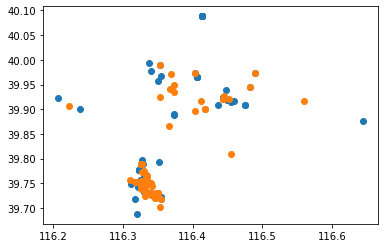

In [41]:
plt.scatter(start_1,start_2)
plt.scatter(end_1,end_2)

In [42]:
df.head()

,Serial number,Model,Time to get on the train,city,starting point,end,Mileage [km],The amount [yuan],datetime,DATE,MONTH,Time_Period
0,1,express train,03-28 23:14 Thursday,Beijing,Xingye Street | Beijing Petrochemical Institut...,Guanyin Temple Community 25th,4.5,17.20,2020-03-28,Thursday,03,evening
1,2,express train,03-31 15:21 Sunday,Beijing,Xinghua Street | Zaoyuan East - West District ...,Daxing District | Kang Taiyuan,2.8,10.40,2020-03-31,Sunday,03,afternoon
2,3,express train,03-31 19:48 Sunday,Beijing,Kangmei Road | Kang Taiyuan - South Gate,Xingye Street | Beijing Petrochemical Institut...,2.3,9.10,2020-03-31,Sunday,03,evening
3,4,express train,04-02 10:34 Tuesday,Beijing,Beijing Petrochemical Academy - South Gate,Guanyin Temple Community 25th,3.9,11.44,2020-04-02,Tuesday,04,morning
4,5,express train,04-03 07:13 Wednesday,Beijing,Guanyin Temple - North Gate,Xinghua Street | Beijing Petrochemical Institu...,3.8,18.08,2020-04-03,Wednesday,04,morning


In [68]:
df1_temp = pd.DataFrame({'s1':end_1,
                         's2':end_2,
                         'p':df['end'].to_list(),
                         'city':df['city'].to_list(),
                         't':df['Time to get on the train'].to_list()})
df1_temp

,s1,s2,p,city,t
0,116.347300,39.7278,Guanyin Temple Community 25th,Beijing,03-28 23:14 Thursday
1,116.341483,39.7269,Daxing District | Kang Taiyuan,Beijing,03-31 15:21 Sunday
2,116.324701,39.7499,Xingye Street | Beijing Petrochemical Institut...,Beijing,03-31 19:48 Sunday
3,116.347300,39.7278,Guanyin Temple Community 25th,Beijing,04-02 10:34 Tuesday
4,116.325793,39.7462,Xinghua Street | Beijing Petrochemical Institu...,Beijing,04-03 07:13 Wednesday
...,...,...,...,...,...
275,116.347300,39.7278,"Building 25, Guanyin Temple, Daxing District, ...",Beijing,08-18 07:23 Wednesday
276,116.332131,39.7562,Xinghua Street | Zaoyuan Shangcheng South Dist...,Beijing,08-18 15:05 Wednesday
277,116.366150,39.8669,"Right Anmen | Beijing You'an Hospital, Capital...",Beijing,08-18 15:45 Wednesday
278,116.341483,39.7269,Daxing District | No. 189 Xingsheng Street - E...,Beijing,08-18 18:56 Wednesday


In [69]:
df1_temp=df1_temp.sort_values(by=['s1'])
df1_temp

,s1,s2,p,city,t
162,116.223015,39.9063,Shijingshan District | Northern University of ...,Beijing,04-01 11:52 Thursday
43,116.310022,39.7574,"No. 53, Kangzhuang Road, Daxing District | Kan...",Beijing,06-09 16:09 Sunday
268,116.317697,39.7516,"No. 189, Xinxing Street, Xingsheng Street and ...",Beijing,08-10 09:56 Tuesday
153,116.319891,39.7528,"150m-Biyuan, Intersection of Xingye Street and...",Beijing,01-19 15:05 Sunday
119,116.324701,39.7499,Xingye Street | Beijing Petrochemical Institut...,Beijing,10-09 13:13 Wednesday
...,...,...,...,...,...
261,116.452766,39.9216,East Bridge | Beijing Qiaofu,Beijing,08-02 11:46 Monday
255,116.455015,39.8086,Old Palace | Ming Yue Bay - 1 door,Beijing,07-29 12:33 Thursday
241,116.482470,39.9442,Chaoyang Park | Solana Blue Harbor - East Five...,Beijing,07-16 13:38 Friday
129,116.488955,39.9730,Putting Table | Zmax Hotels Beijing Jiqian 798...,Beijing,11-24 17:40 Sunday


In [71]:
df_temp = pd.DataFrame({'s1':start_1,
                        's2':start_2,
                        'p':df['starting point'].to_list(),
                        'city':df['city'].to_list(),
                        't':df['Time to get on the train'].to_list()})
df_temp

,s1,s2,p,city,t
0,116.324701,39.7499,Xingye Street | Beijing Petrochemical Institut...,Beijing,03-28 23:14 Thursday
1,116.333828,39.7503,Xinghua Street | Zaoyuan East - West District ...,Beijing,03-31 15:21 Sunday
2,116.325202,39.7572,Kangmei Road | Kang Taiyuan - South Gate,Beijing,03-31 19:48 Sunday
3,116.325793,39.7462,Beijing Petrochemical Academy - South Gate,Beijing,04-02 10:34 Tuesday
4,116.347837,39.7286,Guanyin Temple - North Gate,Beijing,04-03 07:13 Wednesday
...,...,...,...,...,...
275,116.459081,39.9170,Beijing Millennium Hotel - Mainmen,Beijing,08-18 07:23 Wednesday
276,116.347837,39.7286,Guanyin Temple - North Gate,Beijing,08-18 15:05 Wednesday
277,116.332131,39.7562,Xinghua Street | Zaoyuan Shangcheng South Dist...,Beijing,08-18 15:45 Wednesday
278,116.320286,39.6879,Beijing Longhu Daxingtian Street - Southeast Gate,Beijing,08-18 18:56 Wednesday


In [72]:
df_temp=df_temp.sort_values(by=['s1'])
df_temp

,s1,s2,p,city,t
163,116.206945,39.9220,Octagody Street | Northern University of Techn...,Beijing,04-01 12:13 Thursday
162,116.238542,39.9011,Tug | Beijing Shijingshan Wanda Plaza - West Gate,Beijing,04-01 11:52 Thursday
216,116.311304,39.7475,"East side of the No. 30, No. 30, Carnation, No...",Beijing,06-28 13:29 Monday
139,116.311309,39.7535,Kangzhuang West Lane | Beijing Daxing Huaxia V...,Beijing,12-27 23:27 Friday
181,116.317580,39.7190,New Sports Street | Nai Xue Tea (Beijing Kaide...,Beijing,05-04 16:19 Tuesday
...,...,...,...,...,...
140,116.475783,39.9082,Dawang Road | LGD (Golden Plaza Shop),Beijing,12-28 08:51 Saturday
141,116.475783,39.9082,Dawang Road | Beijing Bank (Modern City Branch),Beijing,12-28 08:57 Saturday
241,116.482470,39.9442,Chaoyang Park | Juji Metro Station,Beijing,07-16 13:38 Friday
129,116.488955,39.9730,Will Tiantu | Wide Subway Station C,Beijing,11-24 17:40 Sunday


##### change list to dic {'value': '39.9063', 'percent': 'Shijingshan District | Northern University of Technology - South Gate'}

In [73]:
end_dic=[]
for i in [list(z) for z in zip(df1_temp['s2'].to_list(), df1_temp['p'].to_list(),df1_temp['t'].to_list())]:
    end_dic.append({'value':str(i[0]),'detials':str(i[1])})
start_dic=[]
for i in [list(z) for z in zip(df_temp['s2'].to_list(), df_temp['p'].to_list(),df_temp['t'].to_list())]:
    start_dic.append({'value':str(i[0]),'detials':str(i[1])})
print(len(start_dic))

280


In [95]:
    from pyecharts import options as opts
    from pyecharts.charts import Scatter
    from pyecharts.commons.utils import JsCode

    c = (
        Scatter()
        .add_xaxis(df_temp['s1'].to_list())
        .add_yaxis(
            "pick_up",
            start_dic,
            # 标记的大小
            symbol_size=5,
            #标签配置项
            label_opts=opts.LabelOpts(
                formatter=JsCode(
                    # 构造回调函数
                    "function(params){return params.value[1] +' : '+ params.value[2];}"
                ) 
            ),
        )
        .add_xaxis(df1_temp['s1'].to_list())
        .add_yaxis(
            "drop off",
            end_dic,
            # 标记的大小
            symbol_size=5,
            xaxis_index=0,
            #标签配置项
            label_opts=opts.LabelOpts(
                formatter=JsCode(
                    # 构造回调函数
                    "function(params){return params.value[1] +' : '+ params.value[2];}"
                )  
            ),
        )
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(name='Longitude',
                                     boundary_gap=['5%','5'],
                                     splitline_opts=opts.SplitLineOpts(is_show=True)),
            yaxis_opts=opts.AxisOpts(name='Latitude',
                                     splitline_opts=opts.SplitLineOpts(is_show=True),
                                     split_number=5
                                        ),
            title_opts=opts.TitleOpts(title="Scatter"),
             # 提示框配置项
            tooltip_opts=opts.TooltipOpts(
                formatter=JsCode(
                    # 构造回调函数
                    "function (params) {return params.name + '\n ' + params.value+'   '+params.details;}"
                ), 
                axis_pointer_type = "cross",
                trigger_on= "mousemove|click",
                is_show_content= True,
                position='bottom',
            ),
            #
            datazoom_opts=opts.DataZoomOpts(
            orient = "vertical",
            range_start = 98.9,
            range_end=99.7),
    #         datazoom_opts=opts.DataZoomOpts(
    #         orient = "horizon",
    #         range_start = 0.1,
    #         )
            # 视觉映射配置项
    #         visualmap_opts=opts.VisualMapOpts(
    #             #颜色映射
    #             type_="color", 
    #             max_=150, 
    #             min_=20, 
    #             dimension=3 ## 组件映射维度
    #         ),
        )
        .set_series_opts(
            label_opts=opts.LabelOpts(
                    is_show = False
            )
        )

    ).render_notebook()
    c

#  Hover

In [75]:
def split_t(dt):
    if dt.split( )[2] =='on':
        return dt.split( )[3]
    if dt.split( )[2] =='??Monday':
        return 'Monday'
    return dt.split( )[2]

In [76]:
df1_px=df1_temp
df1_px

,s1,s2,p,city,t
162,116.223015,39.9063,Shijingshan District | Northern University of ...,Beijing,04-01 11:52 Thursday
43,116.310022,39.7574,"No. 53, Kangzhuang Road, Daxing District | Kan...",Beijing,06-09 16:09 Sunday
268,116.317697,39.7516,"No. 189, Xinxing Street, Xingsheng Street and ...",Beijing,08-10 09:56 Tuesday
153,116.319891,39.7528,"150m-Biyuan, Intersection of Xingye Street and...",Beijing,01-19 15:05 Sunday
119,116.324701,39.7499,Xingye Street | Beijing Petrochemical Institut...,Beijing,10-09 13:13 Wednesday
...,...,...,...,...,...
261,116.452766,39.9216,East Bridge | Beijing Qiaofu,Beijing,08-02 11:46 Monday
255,116.455015,39.8086,Old Palace | Ming Yue Bay - 1 door,Beijing,07-29 12:33 Thursday
241,116.482470,39.9442,Chaoyang Park | Solana Blue Harbor - East Five...,Beijing,07-16 13:38 Friday
129,116.488955,39.9730,Putting Table | Zmax Hotels Beijing Jiqian 798...,Beijing,11-24 17:40 Sunday


In [77]:
df1_px['week']=df1_px['t'].map(split_t)
df1_px

,s1,s2,p,city,t,week
162,116.223015,39.9063,Shijingshan District | Northern University of ...,Beijing,04-01 11:52 Thursday,Thursday
43,116.310022,39.7574,"No. 53, Kangzhuang Road, Daxing District | Kan...",Beijing,06-09 16:09 Sunday,Sunday
268,116.317697,39.7516,"No. 189, Xinxing Street, Xingsheng Street and ...",Beijing,08-10 09:56 Tuesday,Tuesday
153,116.319891,39.7528,"150m-Biyuan, Intersection of Xingye Street and...",Beijing,01-19 15:05 Sunday,Sunday
119,116.324701,39.7499,Xingye Street | Beijing Petrochemical Institut...,Beijing,10-09 13:13 Wednesday,Wednesday
...,...,...,...,...,...,...
261,116.452766,39.9216,East Bridge | Beijing Qiaofu,Beijing,08-02 11:46 Monday,Monday
255,116.455015,39.8086,Old Palace | Ming Yue Bay - 1 door,Beijing,07-29 12:33 Thursday,Thursday
241,116.482470,39.9442,Chaoyang Park | Solana Blue Harbor - East Five...,Beijing,07-16 13:38 Friday,Friday
129,116.488955,39.9730,Putting Table | Zmax Hotels Beijing Jiqian 798...,Beijing,11-24 17:40 Sunday,Sunday


In [78]:
df_px=df_temp
df_px

,s1,s2,p,city,t
163,116.206945,39.9220,Octagody Street | Northern University of Techn...,Beijing,04-01 12:13 Thursday
162,116.238542,39.9011,Tug | Beijing Shijingshan Wanda Plaza - West Gate,Beijing,04-01 11:52 Thursday
216,116.311304,39.7475,"East side of the No. 30, No. 30, Carnation, No...",Beijing,06-28 13:29 Monday
139,116.311309,39.7535,Kangzhuang West Lane | Beijing Daxing Huaxia V...,Beijing,12-27 23:27 Friday
181,116.317580,39.7190,New Sports Street | Nai Xue Tea (Beijing Kaide...,Beijing,05-04 16:19 Tuesday
...,...,...,...,...,...
140,116.475783,39.9082,Dawang Road | LGD (Golden Plaza Shop),Beijing,12-28 08:51 Saturday
141,116.475783,39.9082,Dawang Road | Beijing Bank (Modern City Branch),Beijing,12-28 08:57 Saturday
241,116.482470,39.9442,Chaoyang Park | Juji Metro Station,Beijing,07-16 13:38 Friday
129,116.488955,39.9730,Will Tiantu | Wide Subway Station C,Beijing,11-24 17:40 Sunday


In [79]:
df_px['week']=df_px['t'].map(split_t)
df_px

,s1,s2,p,city,t,week
163,116.206945,39.9220,Octagody Street | Northern University of Techn...,Beijing,04-01 12:13 Thursday,Thursday
162,116.238542,39.9011,Tug | Beijing Shijingshan Wanda Plaza - West Gate,Beijing,04-01 11:52 Thursday,Thursday
216,116.311304,39.7475,"East side of the No. 30, No. 30, Carnation, No...",Beijing,06-28 13:29 Monday,Monday
139,116.311309,39.7535,Kangzhuang West Lane | Beijing Daxing Huaxia V...,Beijing,12-27 23:27 Friday,Friday
181,116.317580,39.7190,New Sports Street | Nai Xue Tea (Beijing Kaide...,Beijing,05-04 16:19 Tuesday,Tuesday
...,...,...,...,...,...,...
140,116.475783,39.9082,Dawang Road | LGD (Golden Plaza Shop),Beijing,12-28 08:51 Saturday,Saturday
141,116.475783,39.9082,Dawang Road | Beijing Bank (Modern City Branch),Beijing,12-28 08:57 Saturday,Saturday
241,116.482470,39.9442,Chaoyang Park | Juji Metro Station,Beijing,07-16 13:38 Friday,Friday
129,116.488955,39.9730,Will Tiantu | Wide Subway Station C,Beijing,11-24 17:40 Sunday,Sunday


In [80]:
df_px['p_or_d'] ='pick up'
df1_px['p_or_d'] ='drop off'
result = pd.concat([df_px,df1_px])
result

,s1,s2,p,city,t,week,p_or_d
163,116.206945,39.9220,Octagody Street | Northern University of Techn...,Beijing,04-01 12:13 Thursday,Thursday,pick up
162,116.238542,39.9011,Tug | Beijing Shijingshan Wanda Plaza - West Gate,Beijing,04-01 11:52 Thursday,Thursday,pick up
216,116.311304,39.7475,"East side of the No. 30, No. 30, Carnation, No...",Beijing,06-28 13:29 Monday,Monday,pick up
139,116.311309,39.7535,Kangzhuang West Lane | Beijing Daxing Huaxia V...,Beijing,12-27 23:27 Friday,Friday,pick up
181,116.317580,39.7190,New Sports Street | Nai Xue Tea (Beijing Kaide...,Beijing,05-04 16:19 Tuesday,Tuesday,pick up
...,...,...,...,...,...,...,...
261,116.452766,39.9216,East Bridge | Beijing Qiaofu,Beijing,08-02 11:46 Monday,Monday,drop off
255,116.455015,39.8086,Old Palace | Ming Yue Bay - 1 door,Beijing,07-29 12:33 Thursday,Thursday,drop off
241,116.482470,39.9442,Chaoyang Park | Solana Blue Harbor - East Five...,Beijing,07-16 13:38 Friday,Friday,drop off
129,116.488955,39.9730,Putting Table | Zmax Hotels Beijing Jiqian 798...,Beijing,11-24 17:40 Sunday,Sunday,drop off


In [121]:
result
result_dic=[]
for i in [list(z) for z in zip(result['p'].to_list(),result['s1'].to_list(), result['s2'].to_list(),result['p_or_d'].to_list())]:
    end_dic.append({'value':str(i[0]),'detials':i[1:]})

In [132]:
import pydeck as pdk
import pandas as pd
import math

SCATTERPLOT_LAYER_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/bart-stations.json"
df = pd.read_json(SCATTERPLOT_LAYER_DATA)
# Use pandas to calculate additional data
df["exits_radius"] = df["exits"].apply(lambda exits_count: math.sqrt(exits_count))

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    result,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius="exits_radius",
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=39.9220, longitude=116.206945, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}\n{address}"})
r.to_html("scatterplot_layer.html")

In [128]:
from pyecharts import Geo,Style
import pandas as pd 
geo.add("",attr,value,visual_range=[0,100],symbol_size= 5,
        visual_text_color= "#fff",is_piecewise = True,
        is_visualmap= True,maptype = '东莞', visual_split_number= 10,
        geo_cities_coords=geo_cities_coords)

ImportError: cannot import name 'Geo' from 'pyecharts' (D:\Anaconda3\lib\site-packages\pyecharts\__init__.py)

In [145]:
import plotly.express as px

fig = px.scatter(result, x="s1", y="s2", log_x=True,color='p_or_d',
                 hover_name="p", hover_data=["s1","s2","t"])

fig.show()

## draft

In [160]:
points_list = result["p_or_d"].unique()
np.insert(points_list, 0, ["ALL"], axis=0)

array(['ALL', 'pick up', 'drop off'], dtype=object)

In [164]:
part_df1 = result[ (result["p_or_d"] == 'pick up')]

In [165]:
part_df1

,s1,s2,p,city,t,week,p_or_d
163,116.206945,39.9220,Octagody Street | Northern University of Techn...,Beijing,04-01 12:13 Thursday,Thursday,pick up
162,116.238542,39.9011,Tug | Beijing Shijingshan Wanda Plaza - West Gate,Beijing,04-01 11:52 Thursday,Thursday,pick up
216,116.311304,39.7475,"East side of the No. 30, No. 30, Carnation, No...",Beijing,06-28 13:29 Monday,Monday,pick up
139,116.311309,39.7535,Kangzhuang West Lane | Beijing Daxing Huaxia V...,Beijing,12-27 23:27 Friday,Friday,pick up
181,116.317580,39.7190,New Sports Street | Nai Xue Tea (Beijing Kaide...,Beijing,05-04 16:19 Tuesday,Tuesday,pick up
...,...,...,...,...,...,...,...
140,116.475783,39.9082,Dawang Road | LGD (Golden Plaza Shop),Beijing,12-28 08:51 Saturday,Saturday,pick up
141,116.475783,39.9082,Dawang Road | Beijing Bank (Modern City Branch),Beijing,12-28 08:57 Saturday,Saturday,pick up
241,116.482470,39.9442,Chaoyang Park | Juji Metro Station,Beijing,07-16 13:38 Friday,Friday,pick up
129,116.488955,39.9730,Will Tiantu | Wide Subway Station C,Beijing,11-24 17:40 Sunday,Sunday,pick up


In [166]:
part_df1.iloc[1].values.tolist()[-2]

'Thursday'

In [167]:
part_df1.iloc[1].values.tolist()[-1]

'pick up'